# Caste Based Hate Crime Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('crime_by_district_rt.csv')

In [4]:
df.head(10)

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,0,0,0,0,0,0,0,0,0
6,ANDHRA PRADESH,GUNTUR,2001,4,5,1,0,0,3,53,16,6,53
7,ANDHRA PRADESH,HYDERABAD CITY,2001,0,2,1,0,0,0,0,40,1,35
8,ANDHRA PRADESH,KARIMNAGAR,2001,8,1,3,3,1,0,52,72,6,10
9,ANDHRA PRADESH,KHAMMAM,2001,2,6,0,0,0,0,12,51,0,90


In [5]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Assault on women',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [6]:
df.describe(include = 'all')

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,9385,9385,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000
unique,70,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UTTAR PRADESH,G.R.P.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,866,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.169739,0.913799,1.917102,0.565264,0.046883,0.108151,0.309643,5.759936,14.762387,0.461588,18.805434
std,NaN,NaN,3.756078,1.950945,3.370164,1.609669,0.309237,0.551603,1.022351,14.567091,31.390084,3.851661,42.657607
min,NaN,NaN,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
75%,NaN,NaN,2010.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,14.000000,0.000000,18.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9385 entries, 0 to 9384
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9385 non-null   object
 1   DISTRICT                              9385 non-null   object
 2   Year                                  9385 non-null   int64 
 3   Murder                                9385 non-null   int64 
 4   Assault on women                      9385 non-null   int64 
 5   Kidnapping and Abduction              9385 non-null   int64 
 6   Dacoity                               9385 non-null   int64 
 7   Robbery                               9385 non-null   int64 
 8   Arson                                 9385 non-null   int64 
 9   Hurt                                  9385 non-null   int64 
 10  Prevention of atrocities (POA) Act    9385 non-null   int64 
 11  Protection of Civil Rights (PC

In [8]:
df.duplicated().sum()

1

In [9]:
duplicate_rows = df[df.duplicated]
duplicate_rows

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
196,JAMMU & KASHMIR,ANANTNAG,2001,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.nunique()

STATE/UT                                 70
DISTRICT                                831
Year                                     13
Murder                                   21
Assault on women                         32
Kidnapping and Abduction                 22
Dacoity                                   8
Robbery                                  13
Arson                                    16
Hurt                                    127
Prevention of atrocities (POA) Act      209
Protection of Civil Rights (PCR) Act     51
Other Crimes Against SCs                271
dtype: int64

In [12]:
df.columns = map(str.lower, df.columns)

In [13]:
df.columns

Index(['state/ut', 'district', 'year', 'murder', 'assault on women',
       'kidnapping and abduction', 'dacoity', 'robbery', 'arson', 'hurt',
       'prevention of atrocities (poa) act',
       'protection of civil rights (pcr) act', 'other crimes against scs'],
      dtype='object')

In [14]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df['state/ut'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut'], dtype=object)

In [15]:
df['state/ut'].nunique()

38

In [16]:
df.loc[df['state/ut'] == 'a & n islands', 'state/ut'] = 'a&n islands'
df.loc[df['state/ut'] == 'd & n haveli', 'state/ut'] = 'd&n haveli'
df.loc[df['state/ut'] == 'delhi ut', 'state/ut'] = 'delhi'

In [17]:
df['state/ut'].unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a&n islands', 'chandigarh', 'd&n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry'], dtype=object)

In [18]:
df['state/ut'].nunique()

35

In [19]:
df.columns

Index(['state/ut', 'district', 'year', 'murder', 'assault on women',
       'kidnapping and abduction', 'dacoity', 'robbery', 'arson', 'hurt',
       'prevention of atrocities (poa) act',
       'protection of civil rights (pcr) act', 'other crimes against scs'],
      dtype='object')

In [20]:
df['total_atrocities'] =  df['murder']+df['assault on women']+df['kidnapping and abduction']+df['dacoity']+df['robbery']+df['arson']+df['hurt']+df['prevention of atrocities (poa) act']+df['protection of civil rights (pcr) act']+df['other crimes against scs']
df.head()

,state/ut,district,year,murder,assault on women,kidnapping and abduction,dacoity,robbery,arson,hurt,prevention of atrocities (poa) act,protection of civil rights (pcr) act,other crimes against scs,total_atrocities
0,andhra pradesh,adilabad,2001,0,1,4,0,0,0,3,0,15,32,55
1,andhra pradesh,anantapur,2001,0,4,0,0,0,0,49,21,0,53,127
2,andhra pradesh,chittoor,2001,3,3,0,0,0,0,38,36,0,34,114
3,andhra pradesh,cuddapah,2001,0,3,0,0,0,0,20,52,0,25,100
4,andhra pradesh,east godavari,2001,1,3,0,0,0,0,3,12,63,7,89


In [21]:
df.to_csv("cleaned_rt.csv")

In [22]:
cols = ['murder', 'assault on women', 'kidnapping and abduction', 
        'dacoity', 'robbery', 'arson', 'hurt', 'prevention of atrocities (poa) act',
       'protection of civil rights (pcr) act', 'other crimes against scs']

total_crimes = df[cols].sum().reset_index()
total_crimes.columns = ['atrocities', 'total_crimes']
total_crimes

,atrocities,total_crimes
0,murder,8576
1,assault on women,17992
2,kidnapping and abduction,5305
3,dacoity,440
4,robbery,1015
5,arson,2906
6,hurt,54057
7,prevention of atrocities (poa) act,138545
8,protection of civil rights (pcr) act,4332
9,other crimes against scs,176489


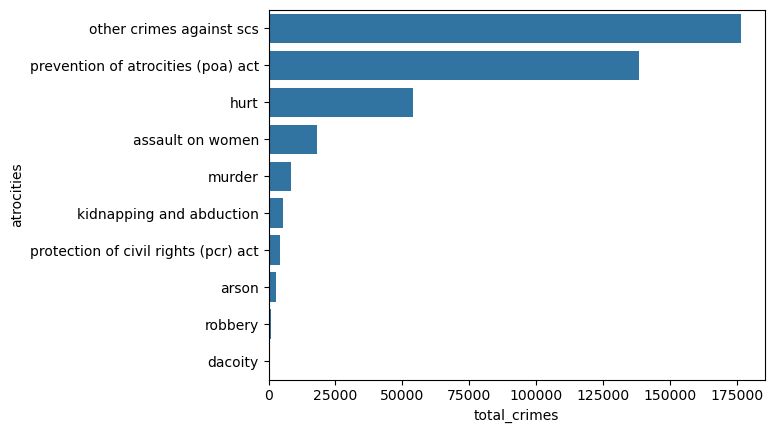

In [23]:
sns.barplot(data=total_crimes.sort_values(by='total_crimes',ascending = False), y='atrocities', x='total_crimes')
plt.show()

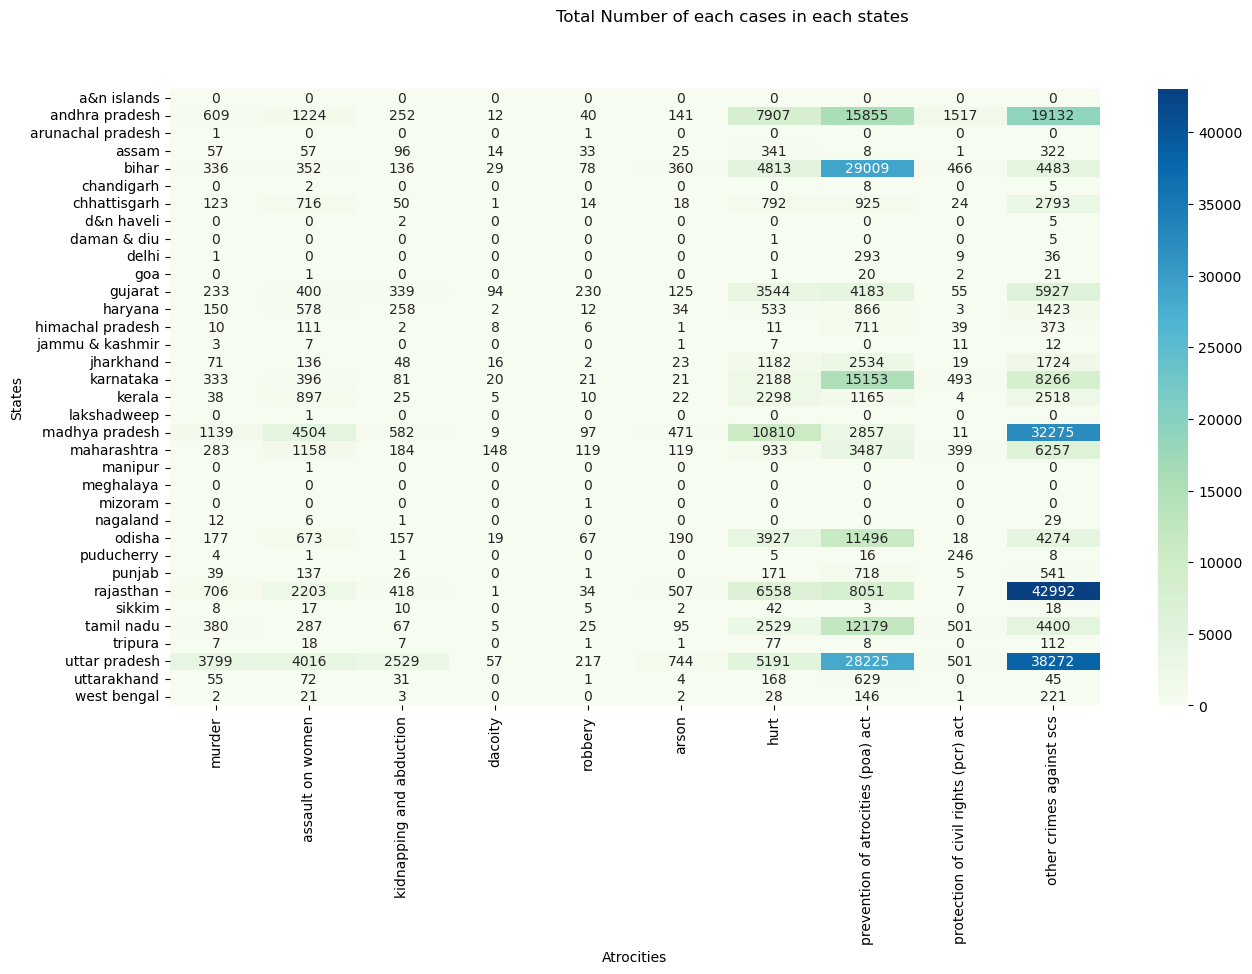

In [24]:
plt.figure(figsize=(15, 8))
totalcrimesbystate = df.groupby('state/ut')[cols].sum()
sns.heatmap(totalcrimesbystate, annot=True, fmt='.0f', cmap='GnBu')
plt.suptitle('Total Number of each cases in each states')
plt.xlabel('Atrocities')
plt.ylabel('States')
plt.show()

<h3>Crime Trends over the Years </h3>

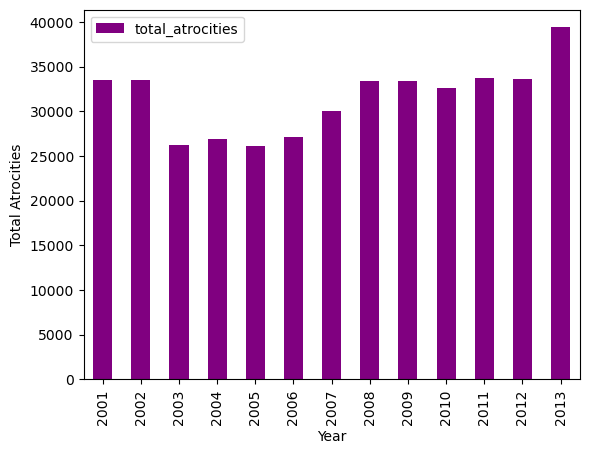

In [25]:
crime_trend = df.groupby('year')['total_atrocities'].sum().reset_index()
crime_trend.plot(x='year', y='total_atrocities', kind='bar', color='purple')
plt.xlabel('Year')
plt.ylabel('Total Atrocities')
plt.show()

<h3>Top states for each crime category:</h3>

In [26]:
df_statewise = df.groupby(['state/ut']).sum().drop(columns=['year','total_atrocities']).reset_index()
numeric_cols = df_statewise.select_dtypes(include='number').columns
top_states = df_statewise.set_index("state/ut")[numeric_cols].idxmax()
print(top_states)

murder                                   uttar pradesh
assault on women                        madhya pradesh
kidnapping and abduction                 uttar pradesh
dacoity                                    maharashtra
robbery                                        gujarat
arson                                    uttar pradesh
hurt                                    madhya pradesh
prevention of atrocities (poa) act               bihar
protection of civil rights (pcr) act    andhra pradesh
other crimes against scs                     rajasthan
dtype: object


<h3>Top 5 Unsafest states:</h3>

In [27]:
top_unsafe_state= df.groupby('state/ut')['total_atrocities'].sum().sort_values(ascending = False ).head(5)
top_unsafe_state

state/ut
uttar pradesh     83551
rajasthan         61477
madhya pradesh    52755
andhra pradesh    46689
bihar             40062
Name: total_atrocities, dtype: int64

<h3>Top 5 safest states:</h3>

In [28]:
top_safe_state= df.groupby('state/ut')['total_atrocities'].sum().sort_values().head(5)
top_safe_state

state/ut
a&n islands    0
meghalaya      0
mizoram        1
manipur        1
lakshadweep    1
Name: total_atrocities, dtype: int64

<h3>Crime Trends over the Years of Each crimes</h3>

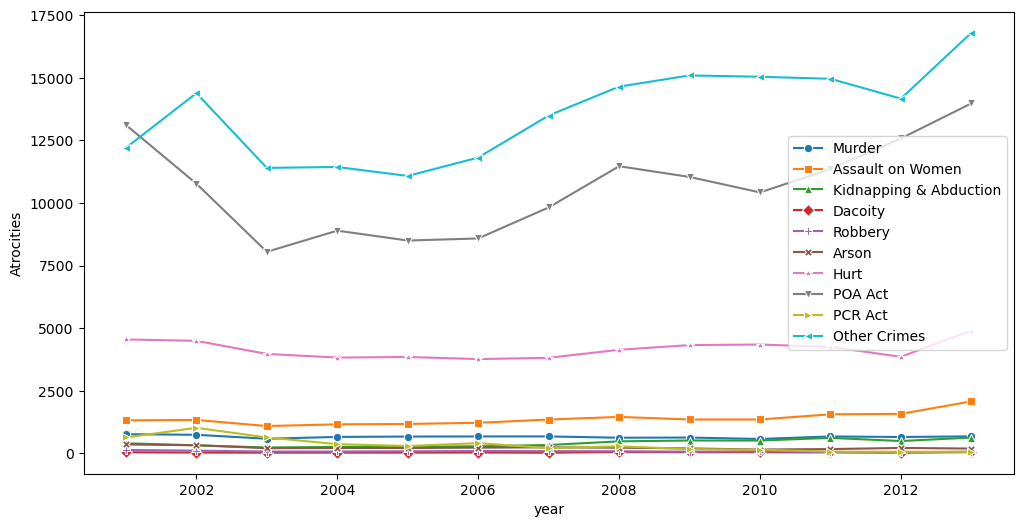

In [29]:
df_yearwise = df.groupby('year').sum(numeric_only=True).reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_yearwise, x="year", y="murder", label="Murder", marker="o")
sns.lineplot(data=df_yearwise, x="year", y="assault on women", label="Assault on Women", marker="s")
sns.lineplot(data=df_yearwise, x="year", y="kidnapping and abduction", label="Kidnapping & Abduction", marker="^")
sns.lineplot(data=df_yearwise, x="year", y="dacoity", label="Dacoity", marker="D")
sns.lineplot(data=df_yearwise, x="year", y="robbery", label="Robbery", marker="P")
sns.lineplot(data=df_yearwise, x="year", y="arson", label="Arson", marker="X")
sns.lineplot(data=df_yearwise, x="year", y="hurt", label="Hurt", marker="*")
sns.lineplot(data=df_yearwise, x="year", y="prevention of atrocities (poa) act", label="POA Act", marker="v")
sns.lineplot(data=df_yearwise, x="year", y="protection of civil rights (pcr) act", label="PCR Act", marker=">")
sns.lineplot(data=df_yearwise, x="year", y="other crimes against scs", label="Other Crimes", marker="<")
plt.ylabel('Atrocities')
plt.show()

<h3>Top 5 safest states for Women:</h3>

In [30]:
women_safe_state = df.groupby('state/ut')['assault on women'].sum().sort_values().head(5)
women_safe_state 

state/ut
a&n islands          0
arunachal pradesh    0
d&n haveli           0
daman & diu          0
delhi                0
Name: assault on women, dtype: int64

<h3>Top 5 Unsafest states for women:</h3>

In [31]:
women_unsafe_state = df.groupby('state/ut')['assault on women'].sum().sort_values(ascending = False).head(5)
women_unsafe_state 

state/ut
madhya pradesh    4504
uttar pradesh     4016
rajasthan         2203
andhra pradesh    1224
maharashtra       1158
Name: assault on women, dtype: int64

<h3>Percentage contribution of each crime to total atrocities:</h3>

In [32]:
total_atrocities = df['total_atrocities'].sum()
crime_sums = df[cols].sum()

# Calculate percentages
crime_percentages = (crime_sums / total_atrocities) * 100
crime_percentages = crime_percentages.sort_values(ascending=False) 
crime_percentages

other crimes against scs                43.082139
prevention of atrocities (poa) act      33.819757
hurt                                    13.195673
assault on women                         4.391967
murder                                   2.093459
kidnapping and abduction                 1.294986
protection of civil rights (pcr) act     1.057470
arson                                    0.709374
robbery                                  0.247768
dacoity                                  0.107407
dtype: float64

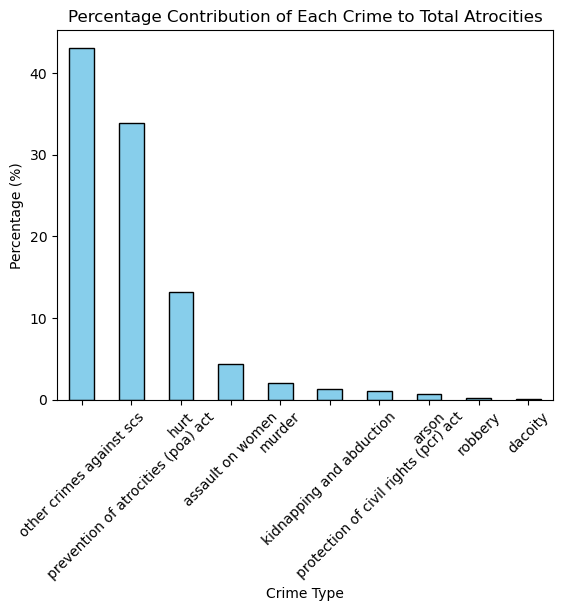

In [33]:
crime_percentages.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage Contribution of Each Crime to Total Atrocities')
plt.xlabel('Crime Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()